In [ ]:
!pip install transformers matplotlib pillow
!pip install huggingface_hub
!pip install datasets
!pip install requests
!pip install PIL

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [ ]:
from transformers import pipeline
import matplotlib.pyplot as plt
import skimage
import numpy as np
from PIL import Image

# Carregar o pipeline de detecção de objetos zero-shot com o modelo OWL-ViT
checkpoint = "google/owlv2-base-patch16-ensemble"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

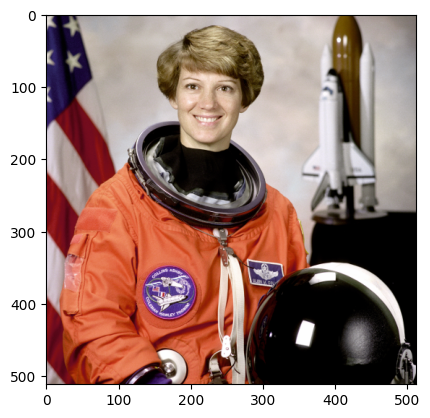

In [ ]:
# Escolher uma imagem para detecção de objetos
import skimage
import numpy as np
from PIL import Image

image = skimage.data.astronaut()
image = Image.fromarray(np.uint8(image)).convert("RGB")

# Passar a imagem e as descrições textuais dos objetos para o pipeline
predictions = detector(
    image,
    candidate_labels=["rosto humano", "foguete", "emblema da NASA", "bandeira estrelada"],
)

# Exibir a imagem usando matplotlib
plt.imshow(image)
plt.show()

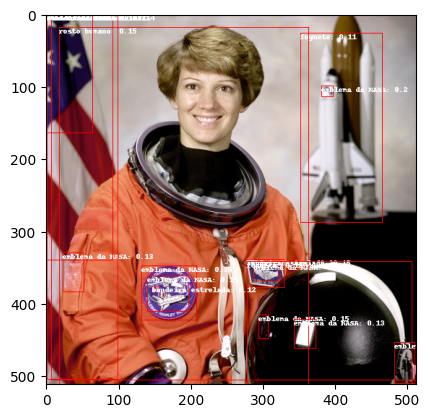

In [ ]:
# Visualizar as previsões
from PIL import ImageDraw

draw = ImageDraw.Draw(image)
for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]
    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score, 2)}", fill="white")

# Exibir a imagem usando matplotlib
plt.imshow(image)
plt.show()

In [ ]:
# Imprimir as previsões
for prediction in predictions:
    print(f"Label: {prediction['label']}, Score: {prediction['score']}, Box: {prediction['box']}")

Label: emblema da NASA, Score: 0.3894648849964142, Box: {'xmin': 278, 'ymin': 339, 'xmax': 329, 'ymax': 378}
Label: emblema da NASA, Score: 0.3887493908405304, Box: {'xmin': 132, 'ymin': 348, 'xmax': 208, 'ymax': 423}
Label: bandeira estrelada, Score: 0.21180814504623413, Box: {'xmin': 1, 'ymin': -1, 'xmax': 99, 'ymax': 505}
Label: emblema da NASA, Score: 0.20098812878131866, Box: {'xmin': 381, 'ymin': 99, 'xmax': 397, 'ymax': 114}
Label: emblema da NASA, Score: 0.17780236899852753, Box: {'xmin': 287, 'ymin': 345, 'xmax': 321, 'ymax': 369}
Label: bandeira estrelada, Score: 0.16861563920974731, Box: {'xmin': 0, 'ymin': 0, 'xmax': 64, 'ymax': 164}
Label: emblema da NASA, Score: 0.15365910530090332, Box: {'xmin': 294, 'ymin': 416, 'xmax': 307, 'ymax': 449}
Label: rosto humano, Score: 0.15245023369789124, Box: {'xmin': 18, 'ymin': 18, 'xmax': 363, 'ymax': 512}
Label: bandeira estrelada, Score: 0.15155792236328125, Box: {'xmin': 278, 'ymin': 339, 'xmax': 329, 'ymax': 378}
Label: emblema da 

In [ ]:
# CPPE-5: Este conjunto de dados é usado para identificar equipamentos de proteção
# pessoal médica (PPE) no contexto da pandemia COVID-191. Você pode carregar este
# conjunto de dados usando o seguinte comando:

#from datasets import load_dataset
#ds = load_dataset("cppe-5")
# https://huggingface.co/docs/transformers/tasks/image_feature_extraction
# https://huggingface.co/docs/transformers/model_doc/vit

In [ ]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
from PIL import Image
import os
from datasets import load_dataset
import requests
from io import BytesIO
import transformers

# Carregar o pipeline de detecção de objetos zero-shot com o modelo OWL-ViT
checkpoint = "google/owlv2-base-patch16-ensemble"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

# Carregar o conjunto de dados "cppe-5"
ds = load_dataset("wider_face")

NameError: name 'WIDERFace' is not defined

In [ ]:
    # Exibir a imagem usando matplotlib
    plt.imshow(image)
    plt.show()

In [ ]:
    # Imprimir as previsões
    for prediction in predictions:
        print(f"Label: {prediction['label']}, Score: {prediction['score']}, Box: {prediction['box']}")

In [ ]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
from PIL import Image
import os
from datasets import load_dataset
import requests
from io import BytesIO

# Carregar o pipeline de detecção de objetos zero-shot com o modelo OWL-ViT
checkpoint = "google/owlv2-base-patch16-ensemble"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

# Carregar o conjunto de dados "cppe-5"
ds = load_dataset("cppe-5")
image = ds["test"]["image"][0]

# Iterar sobre as primeiras 10 imagens do conjunto de dados
for idx, item in enumerate(ds['train'][:10]):
    # Abrir a imagem
    response = requests.get(item['image'])
    image = Image.open(BytesIO(response.content))

    # Passar a imagem e as descrições textuais dos objetos para o pipeline
    predictions = detector(
        image,
        candidate_labels=["rosto humano", "foguete", "emblema da NASA", "bandeira estrelada"],
    )

    # Visualizar as previsões
    from PIL import ImageDraw

    draw = ImageDraw.Draw(image)
    for prediction in predictions:
        box = prediction["box"]
        label = prediction["label"]
        score = prediction["score"]
        xmin, ymin, xmax, ymax = box.values()
        draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
        draw.text((xmin, ymin), f"{label}: {round(score, 2)}", fill="white")

    # Exibir a imagem usando matplotlib
    plt.imshow(image)
    plt.show()

    # Imprimir as previsões
    for prediction in predictions:
        print(f"Label: {prediction['label']}, Score: {prediction['score']}, Box: {prediction['box']}")


TypeError: string indices must be integers

In [ ]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.datasets import WIDERFace
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

# Carregar o conjunto de dados
dataset = WIDERFace(root='path_to_WIDERFace_dataset', download=True, transform=ToTensor())

# Dividir o conjunto de dados em treinamento e validação
train_data, val_data = torch.utils.data.random_split(dataset, [int(0.8 * len(dataset)), len(dataset) - int(0.8 * len(dataset))])

# Criar dataloaders
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16)

# Carregar o modelo
model = fasterrcnn_resnet50_fpn(pretrained=True)

# Definir o otimizador e a função de perda
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = torch.nn.CrossEntropyLoss()

# Treinar o modelo
for epoch in range(num_epochs):
    for images, targets in train_loader:
        # Mover os dados para a GPU se disponível
        images = images.to(device)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Forward pass
        loss_dict = model(images, targets)

        # Calcular a perda total
        losses = sum(loss for loss in loss_dict.values())

        # Backward pass e otimização
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

    # Avaliar o modelo no conjunto de validação
    model.eval()
    with torch.no_grad():
        for images, targets in val_loader:
            # Mover os dados para a GPU se disponível
            images = images.to(device)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            # Forward pass
            loss_dict = model(images, targets)

            # Calcular a perda total
            losses = sum(loss for loss in loss_dict.values())

            print(f'Epoch: {epoch}, Loss: {losses.item()}')


In [ ]:
from transformers import OwlV2ForImageClassification, ImageClassificationPipeline
from datasets import load_dataset

# Carregar o modelo pré-treinado
model = OwlV2ForImageClassification.from_pretrained("google/owlv2-base-patch16-ensemble")

# Carregar seu conjunto de dados personalizado
# Substitua 'seu_dataset' pelo caminho para o seu conjunto de dados
dataset = load_dataset('seu_dataset')

# Dividir o conjunto de dados em treinamento e validação
train_dataset = dataset['train']
val_dataset = dataset['validation']

# Definir o otimizador, a função de perda e a métrica
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = torch.nn.CrossEntropyLoss()
metric = torchmetrics.Accuracy()

# Treinar o modelo
for epoch in range(num_epochs):
    for batch in train_dataloader:
        inputs, targets = batch
        outputs = model(inputs)
        loss = loss_fn(outputs.logits, targets)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Avaliar o modelo no conjunto de validação
    with torch.no_grad():
        for batch in val_dataloader:
            inputs, targets = batch
            outputs = model(inputs)
            metric.update(outputs.logits.argmax(dim=-1), targets)

    print(f"Epoch: {epoch+1}, Accuracy: {metric.compute()}")


In [ ]:
Existem vários algoritmos no Kaggle que podem ser usados para detecção de fraude em cartões de crédito. Aqui estão alguns exemplos:

Credit Card Fraud Detection1: Este conjunto de dados contém transações de cartão de crédito anonimizadas rotuladas como fraudulentas ou genuínas.
Credit Card Fraud Detection usando XGBoost2: Este notebook do Kaggle usa o algoritmo XGBoost para detecção de fraude em cartões de crédito.
Credit_Card_Fraud_Detection3: Este projeto de aprendizado de máquina (aprendizado não supervisionado) usa o algoritmo Isolation Forest para detectar fraude em cartões de crédito com os conjuntos de dados de cartão de crédito do Kaggle.
Credit Card Fraud Detection4: Este notebook do Kaggle explora a detecção de fraude em cartões de crédito usando vários algoritmos de aprendizado de máquina.
Por favor, note que você precisará se familiarizar com a linguagem de programação Python e as bibliotecas de aprendizado de máquina para entender e usar esses algoritmos. Além disso, lembre-se de que a detecção de fraude é um campo complexo que requer uma compreensão profunda das técnicas de aprendizado de máquina e das características específicas dos dados de fraude. É sempre recomendável consultar um especialista ao implementar esses algoritmos em um ambiente de produção.